# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Code optimisation hints



# General step-by-step procedure
<hr style="border:2px solid black"> </hr>


- Follow these steps in chronological order
    - Make it run
    - Make it right
    - Make it fast
- The last pont follows:  less time + less memory footprint = efficient code



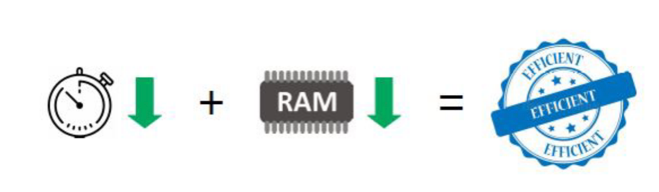

# What does being pythonic mean?
<hr style="border:2px solid black"> </hr>


- Writing efficient Python code:
    - Focus on readability
    - Using Python's constructs as intended (i.e., **Pythonic**) 



In [84]:
numbers = range(10)
# Non-Pythonic 
doubled_numbers = [] 
for i in range(len(numbers)): 
    doubled_numbers.append(numbers[i] * 2)  

# Pythonic 
doubled_numbers = [x * 2 for x in numbers] 

# Debugging 
<hr style="border:2px solid black"> </hr>


- If an errors/exceptsion occirs you can use:
    - `%debug`
    - `%pdb`
    - `%run -d theprogram.py`



# Timing
<hr style="border:2px solid black"> </hr>


- While timing your code you have three options:
    - Time it with `timeit` with a start and stop points
    - Make a decorator and reused it over and over
    - Use ipython magic commands: `%timeit` and `%%timeit`



In [3]:
import time
import timeit

def f(sec):
    """Function sleeps for nsec seconds."""
    time.sleep(sec)

start = timeit.default_timer()
f(5)
elapsed = timeit.default_timer() - start
elapsed

5.003020978000002

In [6]:
def process_time(f, *args, **kwargs):
    def func(*args, **kwargs):
        import timeit
        start = timeit.default_timer()
        f(*args, **kwargs)
        print(timeit.default_timer() - start)
    return func

In [7]:
@process_time
def f1(sec):
    """Function sleeps for nsec seconds."""
    time.sleep(sec)
f1(5)

5.000927955999998


In [12]:
# run the script for 10 loops
%timeit -n10 f(0.01)

11.8 ms ± 359 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
# run the script for 10 loops but consider the 5 best runs only
%timeit -n10 -r5 f(0.01)

11.7 ms ± 238 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


# Data structure and peformance
<hr style="border:2px solid black"> </hr>


- Let's say we have two lists/arrays and we'd like to find the values that are in common.
- What options do we have?



In [37]:
import numpy as np
xs = np.random.randint(0, 1000, 100)
ys = np.random.randint(0, 1000, 100)

**Using array**

In [38]:
def common1(xs, ys):
    """Using lists."""
    zs = set([])
    for x in xs:
        for y in ys:
            if x==y:
                zs.add(x)
    return zs

In [39]:
common1(xs, ys)

{138, 349, 465, 467, 489, 641, 672, 719, 787, 836, 873}

In [41]:
%timeit -n10 -r10 common1(xs, ys)

1.46 ms ± 196 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


**Using set**

In [42]:
%timeit -n10 -r10 set(xs) & set(ys)

38 µs ± 3.39 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


**Using lists**

In [36]:
%timeit -n10 -r10 common1(list(xs), list(ys))

567 µs ± 64.9 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


**intersection and intersection1d**

In [70]:
%timeit -n10 -r10 set(xs).intersection(ys)

56.4 µs ± 18.6 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [71]:
%timeit -n10 -r10 set(xs).intersection(set(ys))

66.2 µs ± 23.3 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [61]:
%timeit -n10 -r10 np.intersect1d(xs,ys)

The slowest run took 6.48 times longer than the fastest. This could mean that an intermediate result is being cached.
49.3 µs ± 44.2 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


**List comprehensions**

In [56]:
%timeit -n10 -r10 [x for x in xs if x in ys]

490 µs ± 52.2 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


# Avoid loops
<hr style="border:2px solid black"> </hr>

In [81]:
import math


def loop1(n):
    """Using for loop with function call."""
    z = []
    for i in range(n):
        z.append(math.sin(i))
    return z


def loop2(n):
    """Using local version of function."""
    z = []
    sin = math.sin
    for i in range(n):
        z.append(sin(i))
    return z


def loop3(n):
    """Using list comprehension."""
    sin = math.sin
    return [sin(i) for i in range(n)]


def loop4(n):
    """Using map."""
    sin = math.sin
    return list(map(sin, range(n)))


def loop5(n):
    """Using numpy."""
    return np.sin(np.arange(n)).tolist()


n = 1000000
%timeit -r1 -n1 loop1(n)
%timeit -r1 -n1 loop2(n)
%timeit -r1 -n1 loop3(n)
%timeit -r1 -n1 loop4(n)
%timeit -r1 -n1 loop5(n)

# Check to make sure they are equivalent and the only things you are changing is the implementation
assert(np.all(loop1(n) == loop2(n)))
assert(np.all(loop1(n) == loop3(n)))
assert(np.all(loop1(n) == loop4(n)))
assert(np.all(loop1(n) == loop5(n)))

259 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
208 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
176 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
149 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
81.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Using in-place operators
<hr style="border:2px solid black"> </hr>

In [75]:
a = np.arange(1e6)

# Not using inplace
%timeit -n100 -r100 global a; a = a * 0
# Using inplace
%timeit -n100 -r100 global a; a *= 0

902 µs ± 56.7 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
630 µs ± 54.2 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


# Using appropriate indexing
<hr style="border:2px solid black"> </hr>

In [76]:
def idx1(xs):
    """Using loops."""
    s = 0
    for x in xs:
        if (x > 10) and (x < 20):
            s += x
    return s

def idx2(xs):
    """Using logical indexing."""
    return np.sum(xs[(xs > 10) & (xs < 20)])

n = 1000000
xs = np.random.randint(0, 100, n)
%timeit -r3 -n3 idx1(xs)
%timeit -r3 -n3 idx2(xs)

530 ms ± 21.4 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)
5.38 ms ± 1.24 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


# Memoization
<hr style="border:2px solid black"> </hr>


- **Memoization** is a technique of recording the intermediate results so that it can be used to avoid repeated calculations and speed up the programs. 
- It can be used to optimize the programs that use **recursion**. 
- In Python, memoization can be done with the help of function *decorators**. 



In [79]:
from functools import lru_cache


def fib(n):
    if n <= 2:
        return 1
    else:
        return fib(n-1) + fib(n-2)

# A simple example of memoization - in practice, use `lru_cache` from functools
def memoize(f):
    store = {}
    def func(n):
        if n not in store:
            store[n] = f(n)
        return store[n]
    return func

@memoize
def mfib(n):
    return fib(n)

@lru_cache()
def lfib(n):
    return fib(n)

assert(fib(10) == mfib(10))
assert(fib(10) == lfib(10))

%timeit -r1 -n10 fib(30)
%timeit -r1 -n10 mfib(30)
%timeit -r1 -n10 lfib(30)

176 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
17.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
17.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


# References
<hr style="border:2px solid black"> </hr>


- https://people.duke.edu/~ccc14/sta-663-2016/A01_CodeOptimization.html
- https://www.geeksforgeeks.org/memoization-using-decorators-in-python/
- https://s3.amazonaws.com/assets.datacamp.com/production/course_13369/slides/chapter1.pdf
    
